In [1]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

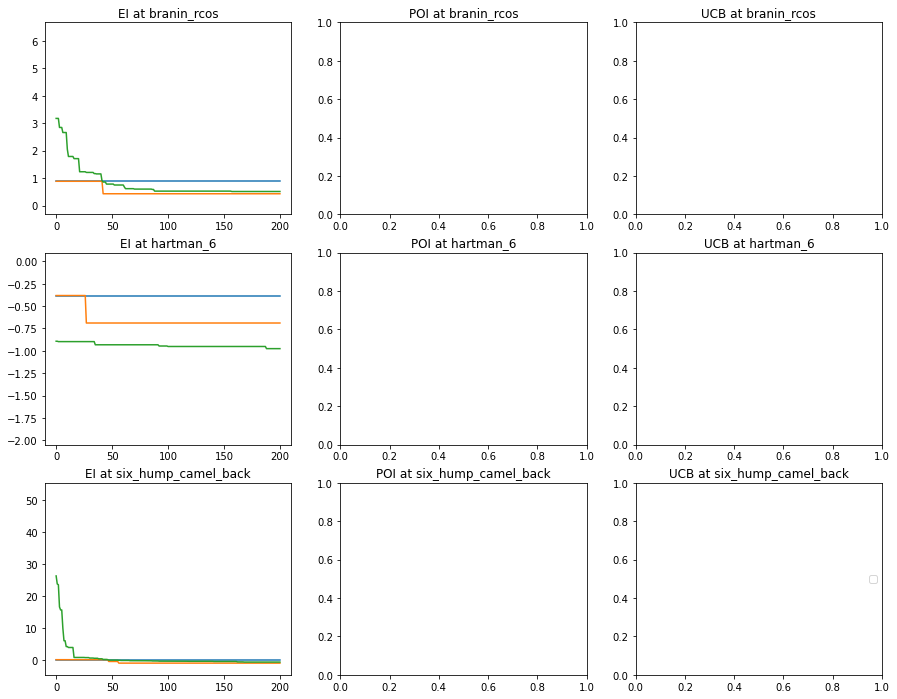

In [2]:
bench_funs = ["branin_rcos", "hartman_6", "six_hump_camel_back"]
acq_funs = ["EI", "POI", "UCB"]
dir_models = [x for x in os.listdir() if "GP" in x]

fig, axs = plt.subplots(len(bench_funs), len(acq_funs), figsize = (15, 12))

for row_ind, bench_fun in enumerate(bench_funs):
    for col_ind, acq_fun in enumerate(acq_funs):
        axs[row_ind, col_ind].set_title(acq_fun + " at " + bench_fun)

len_iter = 10
        
legends = []
for dir_model in dir_models:
    if os.listdir(dir_model):
        legends.append(dir_model)
        for csv_file in os.listdir(dir_model):
            data = pd.read_csv(os.getcwd() + "/" + dir_model + "/" + csv_file)
            for row_ind, bench_fun in enumerate(bench_funs):
                if bench_fun in csv_file:
                    for col_ind, acq_fun in enumerate(acq_funs):
                        if acq_fun in csv_file:
                            mean = data.iloc[:,1:1+len_iter].mean(axis = 1)
                            std = data.iloc[:,1:1+len_iter].mean(axis = 1)
                            axs[row_ind, col_ind].plot(mean)
                            axs[row_ind, col_ind].fill_between(mean - std, mean + std)
                            break
                    break

plt.legend(legends, loc = "right")

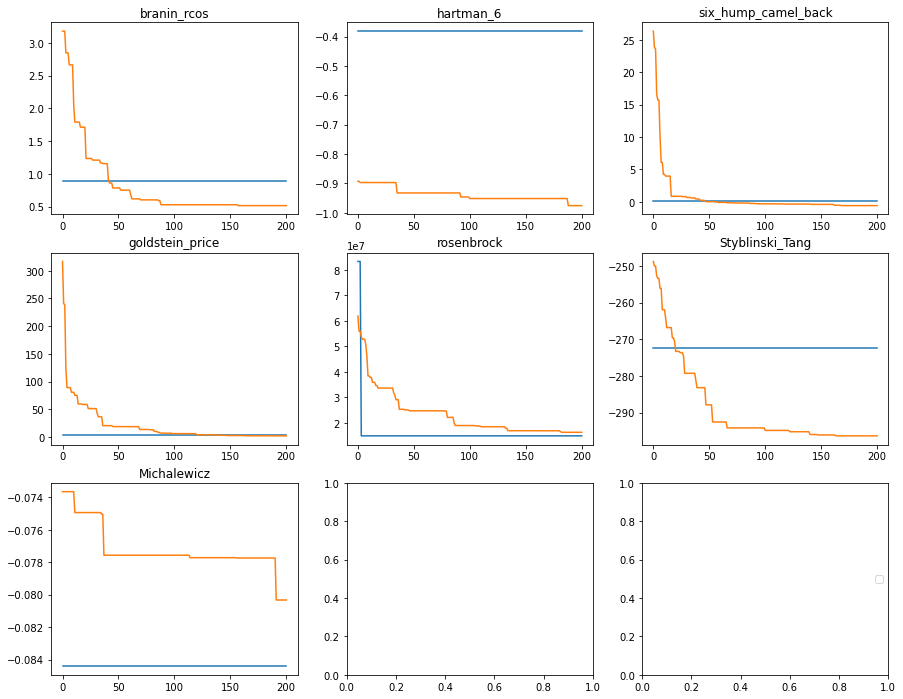

In [3]:
bench_funs = ["branin_rcos", "hartman_6", "six_hump_camel_back", "goldstein_price", "rosenbrock", "Styblinski_Tang", "Michalewicz"]
acq_funs = ["EI"]
dir_models = [x for x in os.listdir() if "GP" in x]

fig, axs = plt.subplots(len(bench_funs) // 3 + 1, 3, figsize = (15, 12))

for ind, bench_fun in enumerate(bench_funs):
    axs[ind // 3, ind % 3].set_title(bench_fun)

len_iter = 10

legends = []
for dir_model in dir_models:
    if dir_model == "GP_horseshoe_manual" or dir_model == "GP_SE":
        legends.append(dir_model)
        for csv_file in os.listdir(dir_model):
            data = pd.read_csv(os.getcwd() + "/" + dir_model + "/" + csv_file)
            for ind, bench_fun in enumerate(bench_funs):
                if bench_fun in csv_file:
                    mean = data.iloc[:,1:1 + len_iter].mean(axis = 1)
                    std = data.iloc[:,1:1 + len_iter].mean(axis = 1)
                    axs[ind // 3, ind % 3].plot(mean)
                    #axs[row_ind, col_ind].fill_between(mean - std, mean + std)
                    break

plt.legend(legends, loc = "right")

In [22]:
sns.set(style="darkgrid")

In [23]:
fmri = sns.load_dataset("fmri")

In [24]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


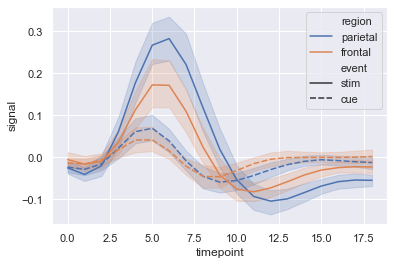

In [25]:
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [ ]:
pd.DataFrame(cols=[])

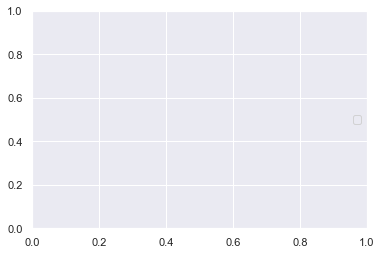

In [26]:
bench_funs = ["branin_rcos", "hartman_6", "six_hump_camel_back", "goldstein_price", "rosenbrock", "Styblinski_Tang", "Michalewicz"]
acq_funs = ["EI"]
dir_models = [x for x in os.listdir() if "GP" in x]

df_res = pd.DataFrame(columns = ["mean", "std"])

for dir_model in dir_models:
    if dir_model == "GP_horseshoe_manual" or dir_model == "GP_SE":
        for csv_file in os.listdir(dir_model):
            data = pd.read_csv(os.getcwd() + "/" + dir_model + "/" + csv_file)
            for ind, bench_fun in enumerate(bench_funs):
                if bench_fun in csv_file:
                    mean = data.iloc[:,1:].mean(axis = 1)
                    std = data.iloc[:,1:].mean(axis = 1)
                    df_res["mean"] = mean
                    break

plt.legend(legends, loc = "right")

In [ ]:
bench_fun

In [27]:
g = sns.FacetGrid(tips, col="time")

NameError: name 'tips' is not defined